##### Z score for Outlier Detection:
* Z score is an important concept in statistics. 
* Z score is also called standard score. 
* This score helps us to understand if a data value is greater or smaller than mean and how far away it is from the mean. 
* More specifically, Z score tells us how many standard deviations away a data point is from the mean.
* A normal distribution is shown below and it is estimated that:
  * 68% of the data points lie between +/- 1 standard deviation.
  * 95% of the data points lie between +/- 2 standard deviation
  * 99.7% of the data points lie between +/- 3 standard deviation
* If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

In [21]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [50]:
#Enable full view of the data
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [93]:
#Loading data
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MDVAL'] = boston.target
data.shape

(506, 14)

In [94]:
#Checking data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDVAL
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


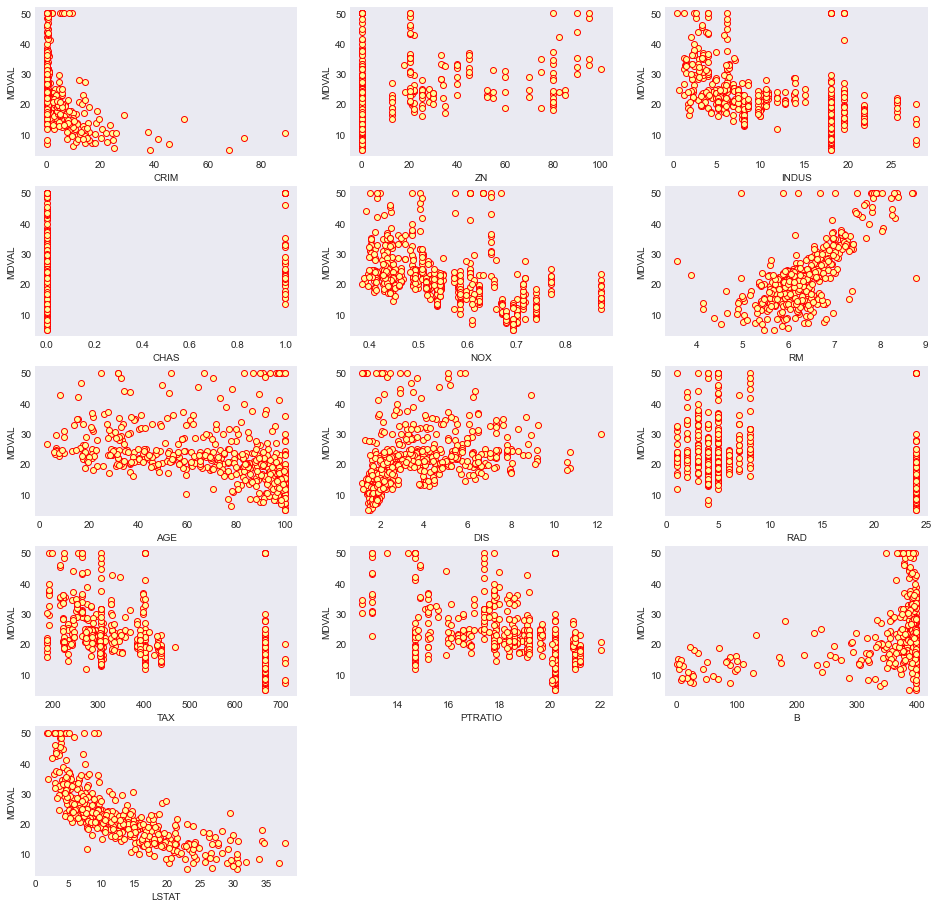

In [20]:
#Creating scatter plots
plt.style.use('seaborn-dark')
plt.figure(figsize=(16,16))
for i,j in enumerate(data.iloc[:,:-1].columns):
    plt.subplot(5,3,i+1)
    plt.scatter(x=data[j], y=data['MDVAL'],c='#ffff99',edgecolors='red',linewidths=1)
    plt.xlabel(j)
    plt.ylabel('MDVAL')

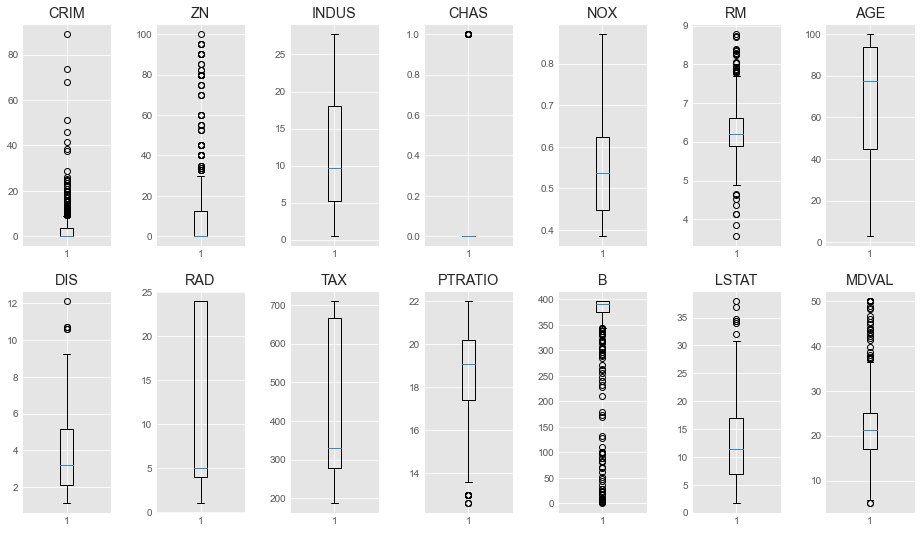

In [86]:
#Creating boxplots
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
for i,j in enumerate(data.columns):
    plt.subplot(2,7,i+1)
    plt.boxplot(data[j]);
    plt.title(j)
plt.subplots_adjust(wspace=0.5)

# Identifying outliers through Z Score

In [25]:
#Identifying outliers through Z Score
z_score = np.abs(stats.zscore(data))
z_score

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [27]:
#Z score converting into dataframe
z_score_df = pd.DataFrame(z_score,columns=data.columns)
z_score_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDVAL
0,0.419782,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562,0.159686
1,0.417339,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439,0.101524
2,0.417342,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727,1.324247
3,0.416750,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517,1.182758
4,0.412482,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.413229,0.487722,0.115738,0.272599,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.418147,0.014454
502,0.415249,0.487722,0.115738,0.272599,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.500850,0.210362
503,0.413447,0.487722,0.115738,0.272599,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.983048,0.148802
504,0.407764,0.487722,0.115738,0.272599,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.865302,0.057989


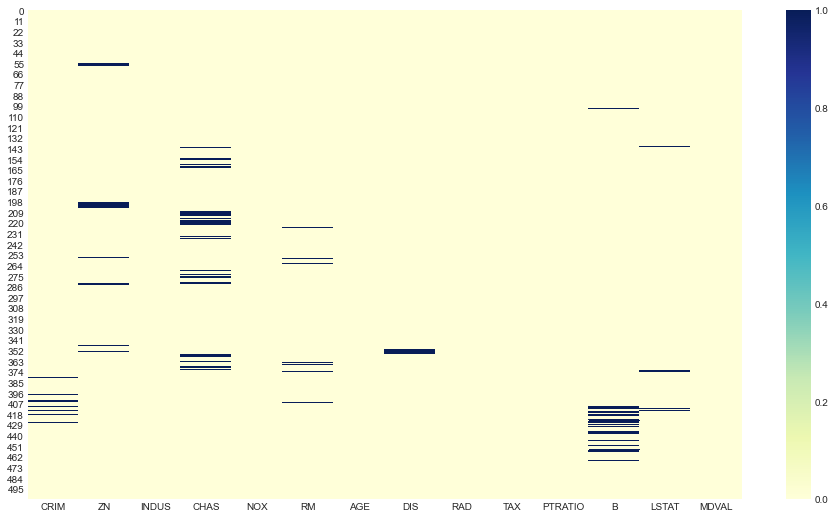

In [43]:
#Visualizing the outliers in the data
plt.figure(figsize=(16,9))
sns.heatmap(z_score_df>3, cmap='YlGnBu');

In [44]:
#Extracting the index numbers of data have an outliers
np.where(z_score_df>3)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 1

In [78]:
#Extracting only data have an outliers
z_score_df_bool = z_score_df>3
z_score_df_bool.iloc[np.where(z_score_df>3)[0],
                    [0, 1, 3, 5, 7, 11, 12]]

,CRIM,ZN,CHAS,RM,DIS,B,LSTAT
55,False,True,False,False,False,False,False
56,False,True,False,False,False,False,False
57,False,True,False,False,False,False,False
102,False,False,False,False,False,True,False
141,False,False,False,False,False,False,True
142,False,False,True,False,False,False,False
152,False,False,True,False,False,False,False
154,False,False,True,False,False,False,False
155,False,False,True,False,False,False,False
160,False,False,True,False,False,False,False


In [80]:
#Extracting only data have an outliers
outliers = data.iloc[np.where(z_score_df>3)[0], [0, 1, 3, 5, 7, 11, 12]]
outliers

,CRIM,ZN,CHAS,RM,DIS,B,LSTAT
55,0.01311,90.0,0.0,7.249,8.6966,395.93,4.81
56,0.02055,85.0,0.0,6.383,9.1876,396.90,5.77
57,0.01432,100.0,0.0,6.816,8.3248,392.90,3.95
102,0.22876,0.0,0.0,6.405,2.7147,70.80,10.63
141,1.62864,0.0,0.0,5.019,1.4394,396.90,34.41
142,3.32105,0.0,1.0,5.403,1.3216,396.90,26.82
152,1.12658,0.0,1.0,5.012,1.6102,343.28,12.12
154,1.41385,0.0,1.0,6.129,1.7494,321.02,15.12
155,3.53501,0.0,1.0,6.152,1.7455,88.01,15.02
160,1.27346,0.0,1.0,6.250,1.7984,338.92,5.50


In [81]:
#Total outliers in the data
len(outliers)

100

In [88]:
#Removing outliers from the data
data.drop(np.where(z_score_df>3)[0], axis=0, inplace=True)

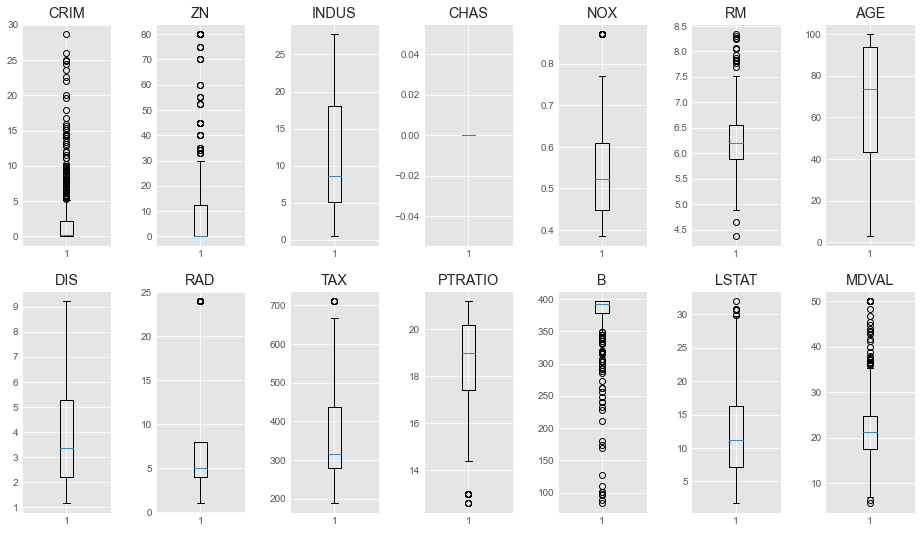

In [89]:
#Creating boxplots
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
for i,j in enumerate(data.columns):
    plt.subplot(2,7,i+1)
    plt.boxplot(data[j]);
    plt.title(j)
plt.subplots_adjust(wspace=0.5)

In [90]:
#Checking shape of the data
data.shape

(415, 14)